In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})


In [5]:
spot_2021 = pd.read_csv("./Final_Inputs/spot_2021_new.csv", delimiter=";", decimal=",", parse_dates=["date"])
spot_2020 = pd.read_csv("./Final_Inputs/spot_2020_new.csv", delimiter=";", decimal=",", parse_dates=["date"])

In [6]:
for i in range(len(spot_2021)):
    spot_2021.loc[i, "hid"] = spot_2021.loc[i, "date"].hour
    spot_2020.loc[i, "hid"] = spot_2020.loc[i, "date"].hour

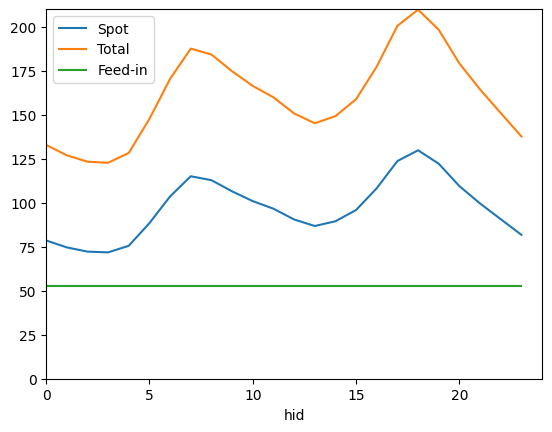

In [7]:
spot_mean_per_hour = spot_2021.groupby("hid")[spot_2021.columns[1]].mean()
total_mean_per_hour = (spot_mean_per_hour + 10) * 1.5
spot_mean_per_hour.plot()
total_mean_per_hour.plot()
plt.xlim([0, 24])
plt.ylim([0, 210])
plt.plot(np.ones(24)*52.5)
plt.legend(["Spot", "Total", "Feed-in"])
plt.show()

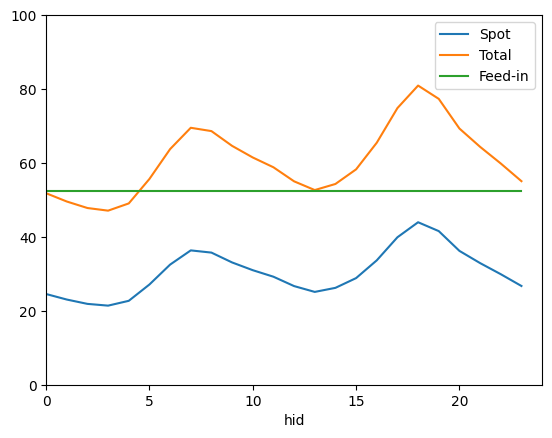

In [25]:
spot_mean_per_hour = spot_2020.groupby("hid")[spot_2020.columns[1]].mean()
total_mean_per_hour = (spot_mean_per_hour + 10) * 1.5
spot_mean_per_hour.plot()
total_mean_per_hour.plot()
plt.xlim([0, 24])
plt.ylim([0, 100])
plt.plot(np.ones(24)*52.5)
plt.legend(["Spot", "Total", "Feed-in"])
plt.show()

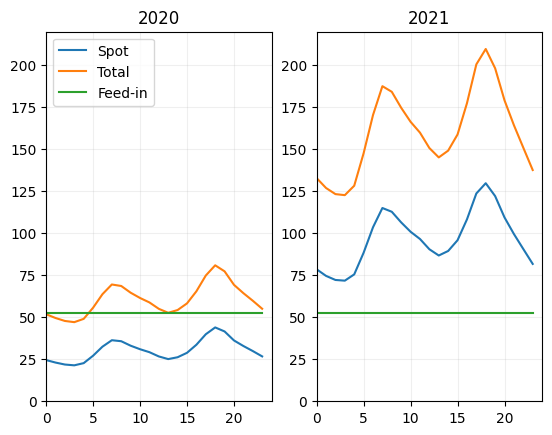

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# title 2020
spot_mean_per_hour_2020 = spot_2020.groupby("hid")[spot_2020.columns[1]].mean()
total_mean_per_hour_2020 = (spot_mean_per_hour_2020 + 10) * 1.5

# title 2021
spot_mean_per_hour_2021 = spot_2021.groupby("hid")[spot_2021.columns[1]].mean()
total_mean_per_hour_2021 = (spot_mean_per_hour_2021 + 10) * 1.5

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot for 2020
ax1.plot(spot_mean_per_hour_2020)
ax1.plot(total_mean_per_hour_2020)
ax1.plot(np.ones(24) * 52.5)
ax1.set_xlim([0, 24])
ax1.set_ylim([0, 220])
ax1.legend(["Spot", "Total", "Feed-in"], loc="upper left")
ax1.grid(alpha=0.2)
ax1.set_title("2020")

# Plot for 2021
ax2.plot(spot_mean_per_hour_2021)
ax2.plot(total_mean_per_hour_2021)
ax2.plot(np.ones(24) * 52.5)
ax2.set_xlim([0, 24])
ax2.set_ylim([0, 220])
ax2.set_title("2021")
ax2.grid(alpha=0.2)

plt.savefig("2020_2021_pv.pdf")
# Display the plot
plt.show()


In [8]:
from FleetRL.fleet_env.fleet_environment import FleetEnv

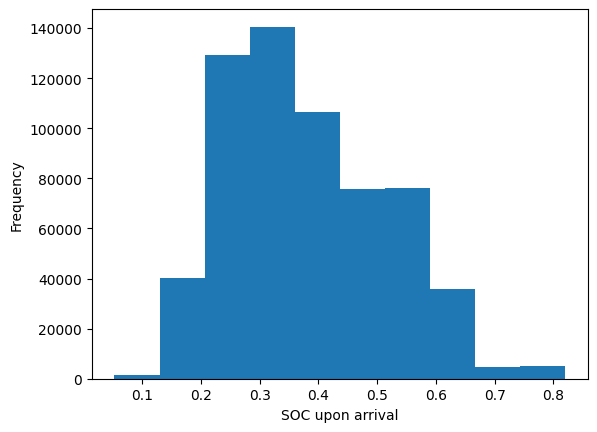

In [9]:
env = FleetEnv(log_data=True,
               include_pv=True,
               schedule_name="30_ct.csv",
               use_case="ct",
               normalize_in_env=False,
               aux=True,
               calculate_degradation=True,
               time_picker="static",
               episode_length=48,
               include_building=True,
               building_name="load_ct.csv",
               price_name="spot_2021_new.csv",
               tariff_name="fixed_feed_in.csv",
               spot_markup=10,
               spot_mul=1.5,
               feed_in_ded=0.25)

ct = env.db.loc[(env.db["SOC_on_return"] > 0) & (env.db["SOC_on_return"] < 0.85), "SOC_on_return"]
ct.plot.hist(bins=10)
plt.ylabel("Frequency")
plt.xlabel("SOC upon arrival")
plt.show()

In [10]:
tot_en = env.db["Consumption_kWh"].sum()/0.91
tot_cost = tot_en * env.db["DELU"].mean()
print(f"Total energy to be charged: {int(tot_en/1000)} MWh")
print(f"Total cost at avg spot: {int(tot_cost/1000)} EUR")

Total energy to be charged: 123 MWh
Total cost at avg spot: 11939 EUR


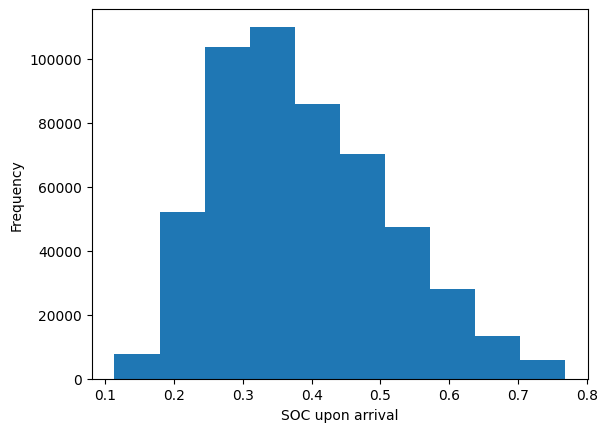

In [11]:
env = FleetEnv(log_data=True,
               include_pv=True,
               schedule_name="25_ut.csv",
               use_case="ut",
               normalize_in_env=False,
               aux=True,
               calculate_degradation=True,
               time_picker="static",
               episode_length=48,
               include_building=True,
               building_name="load_ut.csv",
               price_name="spot_2021_new.csv",
               tariff_name="fixed_feed_in.csv",
               spot_markup=10,
               spot_mul=1.5,
               feed_in_ded=0.25)

ut = env.db.loc[(env.db["SOC_on_return"] > 0) & (env.db["SOC_on_return"] < 0.85), "SOC_on_return"]
ut.plot.hist(bins=10)

plt.ylabel("Frequency")
plt.xlabel("SOC upon arrival")
plt.show()



In [12]:
tot_en = env.db["Consumption_kWh"].sum()/0.91
tot_cost = tot_en * env.db["DELU"].mean()
print(f"Total energy to be charged: {int(tot_en/1000)} MWh")
print(f"Total cost at avg spot: {int(tot_cost/1000)} EUR")

Total energy to be charged: 213 MWh
Total cost at avg spot: 20656 EUR


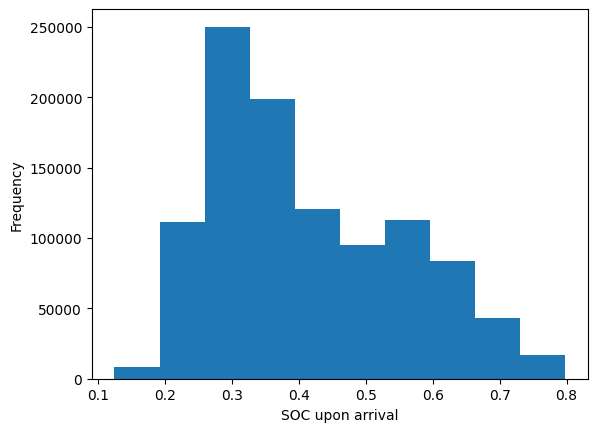

In [13]:
env = FleetEnv(log_data=True,
               include_pv=True,
               schedule_name="50_lmd.csv",
               use_case="lmd",
               normalize_in_env=False,
               aux=True,
               calculate_degradation=True,
               time_picker="static",
               episode_length=48,
               include_building=True,
               building_name="load_lmd.csv",
               price_name="spot_2021_new.csv",
               tariff_name="fixed_feed_in.csv",
               spot_markup=10,
               spot_mul=1.5,
               feed_in_ded=0.25)

lmd=env.db.loc[(env.db["SOC_on_return"] > 0) & (env.db["SOC_on_return"] < 0.85), "SOC_on_return"]
lmd.plot.hist(bins=10)
plt.ylabel("Frequency")
plt.xlabel("SOC upon arrival")
plt.show()

In [14]:
tot_en = env.db["Consumption_kWh"].sum()/0.91
tot_cost = tot_en * env.db["DELU"].mean()
print(f"Total energy to be charged: {int(tot_en/1000)} MWh")
print(f"Total cost at avg spot: {int(tot_cost/1000)} EUR")

Total energy to be charged: 504 MWh
Total cost at avg spot: 48840 EUR


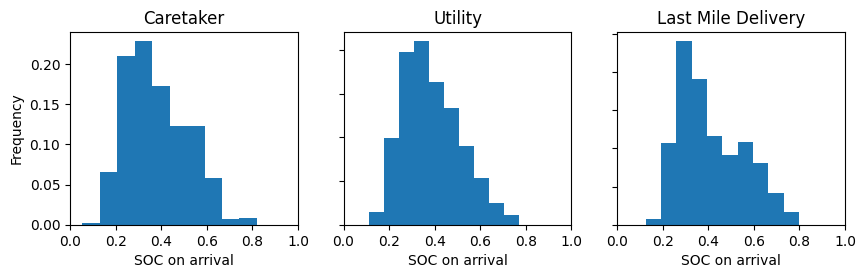

In [15]:
fig, ax = plt.subplots(1,3, figsize=(10,2.5))

# Plot histograms with relative frequencies
ct_weights = np.ones_like(ct) / len(ct)
ut_weights = np.ones_like(ut) / len(ut)
lmd_weights = np.ones_like(lmd) / len(lmd)

ct.plot.hist(ax = ax[0], weights=ct_weights, alpha=1)
ut.plot.hist(ax = ax[1], weights=ut_weights, alpha=1)
lmd.plot.hist(ax = ax[2], weights=lmd_weights, alpha=1)

# ax[0].grid(alpha=0.2)
# ax[1].grid(alpha=0.2)
# ax[2].grid(alpha=0.2)

# Set common x-label
for a in ax:
    a.set_xlabel("SOC on arrival")
    a.set_xlim([0,1])

# Turn off y-axis labels for the second and third plots
ax[1].set_ylabel(None)
ax[2].set_ylabel(None)
ax[1].set_yticklabels("")
ax[2].set_yticklabels("")

ax[0].set_title("Caretaker")
ax[1].set_title("Utility")
ax[2].set_title("Last Mile Delivery")
plt.savefig("soc_on_arrival_all.pdf")
plt.show()


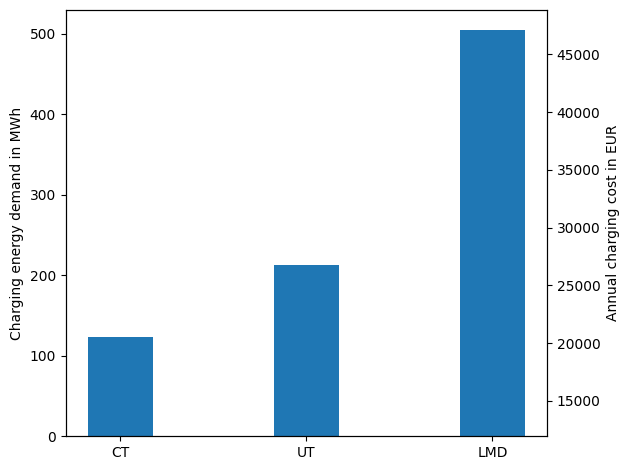

In [20]:
# Creating lists for the energy and costs
energy = [123, 213, 504]
cost = [11939, 20656, 48840]

# Creating labels for the bars
labels = ['CT', 'UT', 'LMD']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots()

# Creating the bar for energy
rects1 = ax1.bar(x, energy, width, label='Charging energy demand in MWh')
ax1.set_ylabel('Charging energy demand in MWh')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)

# Creating the secondary axis for cost
ax2 = ax1.twinx()
ax2.set_ylabel('Annual charging cost in EUR')

# Set the limits for the second y axis
ax2.set_ylim(min(cost), max(cost))

fig.tight_layout()
plt.show()


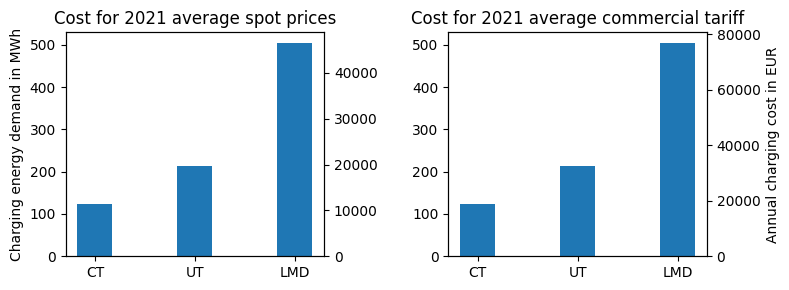

In [34]:
# Calculation of the new costs
cost_new = [(e * (96.84991780821917 + 10) * 1.5) for e in energy]

fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(8, 3))

# Creating the bar for energy
rects1 = ax1.bar(x, energy, width, label='Charging energy demand in MWh')
ax1.set_ylabel('Charging energy demand in MWh')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_title("Cost for 2021 average spot prices")

# Creating the secondary axis for cost
ax2 = ax1.twinx()
ax2.set_ylabel(' ')

# Set the limits for the second y axis in the first subplot
ax2.set_ylim(0, max(cost))

# Creating the bar for energy in the second subplot
rects3 = ax3.bar(x, energy, width, label='Charging energy demand in MWh')
ax3.set_xticks(x)
ax3.set_xticklabels(labels)
ax3.set_title("Cost for 2021 average commercial tariff")

# Creating the secondary axis for cost in the second subplot
ax4 = ax3.twinx()
ax4.set_ylabel('Annual charging cost in EUR')

# Set the limits for the second y axis in the second subplot
ax4.set_ylim(0, max(cost_new))

fig.tight_layout()
plt.savefig("charging_and_economic_comp_all.pdf")
plt.show()


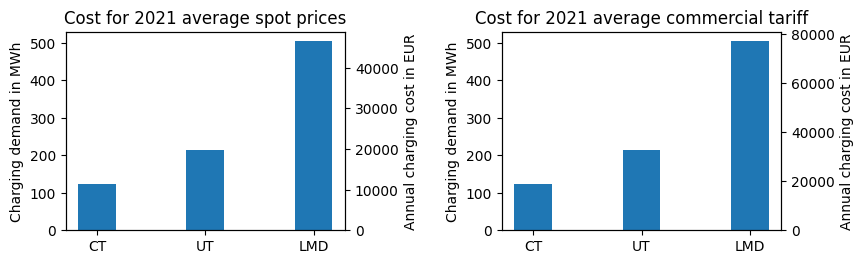

In [53]:
# Calculation of the new costs
cost_new = [(e * (96.84991780821917 + 10) * 1.5) for e in energy]

fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(9, 3))

# Increase the space between the subplots

# Creating the bar for energy
rects1 = ax1.bar(x, energy, width, label='Charging demand in MWh')
ax1.set_ylabel('Charging demand in MWh')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_title("Cost for 2021 average spot prices")

# Creating the secondary axis for cost
ax2 = ax1.twinx()
ax2.set_ylabel('Annual charging cost in EUR')

# Set the limits for the second y axis in the first subplot
ax2.set_ylim(0, max(cost))

# Creating the bar for energy in the second subplot
rects3 = ax3.bar(x, energy, width, label='Charging demand in MWh')
ax3.set_ylabel('Charging demand in MWh')
ax3.set_xticks(x)
ax3.set_xticklabels(labels)
ax3.set_title("Cost for 2021 average commercial tariff")

# Creating the secondary axis for cost in the second subplot
ax4 = ax3.twinx()
ax4.set_ylabel('Annual charging cost in EUR')

# Set the limits for the second y axis in the second subplot
ax4.set_ylim(0, max(cost_new))

fig.tight_layout(pad=2.0)
fig.savefig("charging_and_economic_comp_all.pdf")
plt.show()


In [55]:
env.db.iloc[50]

Location                                    driving
ID                                                0
Consumption_kWh                            0.759165
ChargingStation                                none
PowerRating_kW                                  0.0
Distance_km                                2.485583
date                            2020-01-01 12:30:00
There                                             0
Change                                            0
Group                                             2
TotalConsumption                                0.0
last_trip_total_consumption                     0.0
last_trip_total_length_hours                    0.0
time_left                                       0.0
SOC_on_return                                   0.0
DELU                                          50.78
tariff                                         60.2
load                                       17.67681
pv                                              7.7
price_reward

/tmp/ipykernel_29138/1148419248.py:3: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


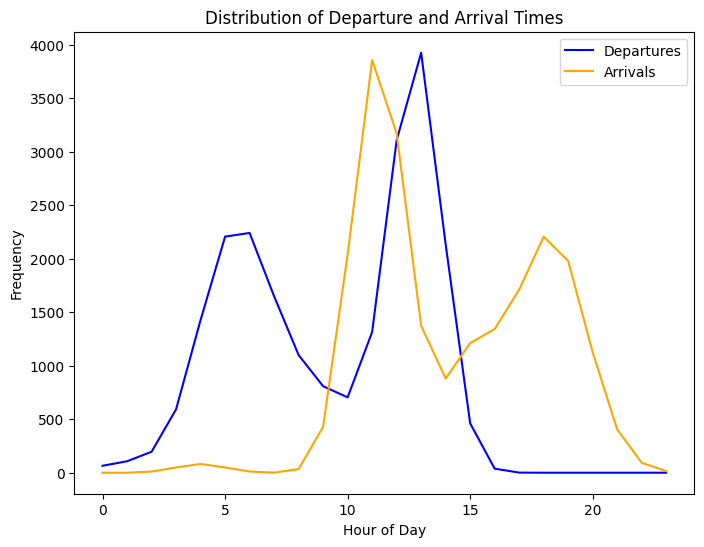

In [56]:
import numpy as np
import pandas as pd
from scipy.ndimage.filters import gaussian_filter1d

# Load the new data from the CSV file
df = pd.read_csv("./Final_Inputs/30_ct.csv")

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create a new column 'Location_shifted' that is the 'Location' column shifted down by 1.
df['Location_shifted'] = df['Location'].shift(-1)

# Create masks for departures and arrivals
departure_mask = (df['Location'] == 'home') & (df['Location_shifted'] == 'driving')
arrival_mask = (df['Location'] == 'driving') & (df['Location_shifted'] == 'home')

# Extract departure and arrival times
departures = df.loc[departure_mask, 'date']
arrivals = df.loc[arrival_mask, 'date']

# Extract the hour from the departure and arrival times
departure_hours = departures.dt.hour
arrival_hours = arrivals.dt.hour

# Compute histograms for departure and arrival hours
departure_hist, bins = np.histogram(departure_hours, bins=24, range=(0,24))
arrival_hist, _ = np.histogram(arrival_hours, bins=24, range=(0,24))

# Smooth the histograms using a Gaussian filter
departure_smooth = gaussian_filter1d(departure_hist, 1)
arrival_smooth = gaussian_filter1d(arrival_hist, 1)

# Plot the smoothed histograms
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(bins[:-1], departure_smooth, label='Departures', color='blue')
ax.plot(bins[:-1], arrival_smooth, label='Arrivals', color='orange')

ax.set_title('Distribution of Departure and Arrival Times')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Frequency')
ax.legend()

plt.show()


/tmp/ipykernel_29138/3423420436.py:3: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


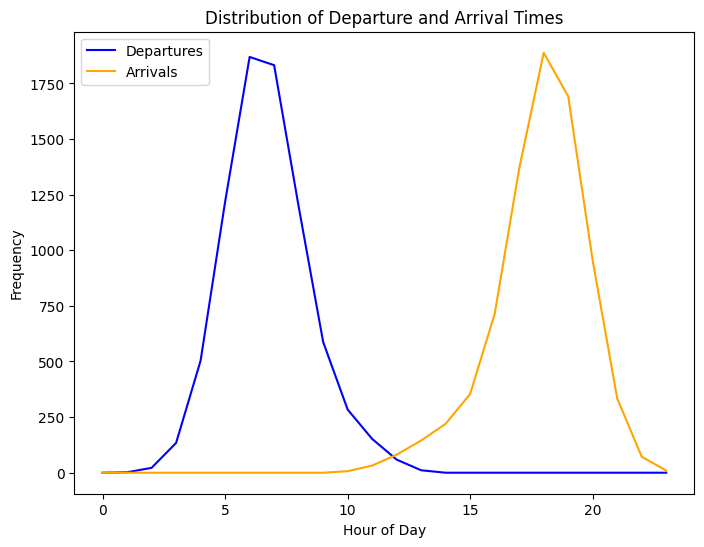

In [57]:
import numpy as np
import pandas as pd
from scipy.ndimage.filters import gaussian_filter1d

# Load the new data from the CSV file
df = pd.read_csv("./Final_Inputs/25_ut.csv")

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create a new column 'Location_shifted' that is the 'Location' column shifted down by 1.
df['Location_shifted'] = df['Location'].shift(-1)

# Create masks for departures and arrivals
departure_mask = (df['Location'] == 'home') & (df['Location_shifted'] == 'driving')
arrival_mask = (df['Location'] == 'driving') & (df['Location_shifted'] == 'home')

# Extract departure and arrival times
departures = df.loc[departure_mask, 'date']
arrivals = df.loc[arrival_mask, 'date']

# Extract the hour from the departure and arrival times
departure_hours = departures.dt.hour
arrival_hours = arrivals.dt.hour

# Compute histograms for departure and arrival hours
departure_hist, bins = np.histogram(departure_hours, bins=24, range=(0,24))
arrival_hist, _ = np.histogram(arrival_hours, bins=24, range=(0,24))

# Smooth the histograms using a Gaussian filter
departure_smooth = gaussian_filter1d(departure_hist, 1)
arrival_smooth = gaussian_filter1d(arrival_hist, 1)

# Plot the smoothed histograms
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(bins[:-1], departure_smooth, label='Departures', color='blue')
ax.plot(bins[:-1], arrival_smooth, label='Arrivals', color='orange')

ax.set_title('Distribution of Departure and Arrival Times')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Frequency')
ax.legend()

plt.show()


/tmp/ipykernel_29138/717502386.py:3: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


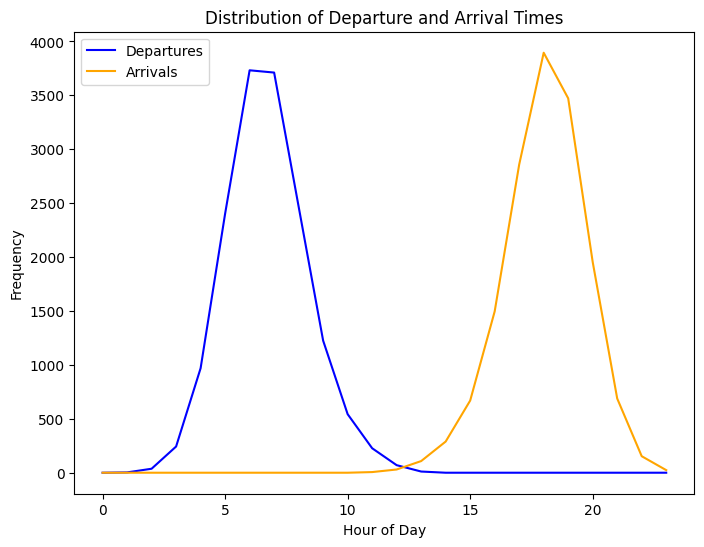

In [58]:
import numpy as np
import pandas as pd
from scipy.ndimage.filters import gaussian_filter1d

# Load the new data from the CSV file
df = pd.read_csv("./Final_Inputs/50_lmd.csv")

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create a new column 'Location_shifted' that is the 'Location' column shifted down by 1.
df['Location_shifted'] = df['Location'].shift(-1)

# Create masks for departures and arrivals
departure_mask = (df['Location'] == 'home') & (df['Location_shifted'] == 'driving')
arrival_mask = (df['Location'] == 'driving') & (df['Location_shifted'] == 'home')

# Extract departure and arrival times
departures = df.loc[departure_mask, 'date']
arrivals = df.loc[arrival_mask, 'date']

# Extract the hour from the departure and arrival times
departure_hours = departures.dt.hour
arrival_hours = arrivals.dt.hour

# Compute histograms for departure and arrival hours
departure_hist, bins = np.histogram(departure_hours, bins=24, range=(0,24))
arrival_hist, _ = np.histogram(arrival_hours, bins=24, range=(0,24))

# Smooth the histograms using a Gaussian filter
departure_smooth = gaussian_filter1d(departure_hist, 1)
arrival_smooth = gaussian_filter1d(arrival_hist, 1)

# Plot the smoothed histograms
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(bins[:-1], departure_smooth, label='Departures', color='blue')
ax.plot(bins[:-1], arrival_smooth, label='Arrivals', color='orange')

ax.set_title('Distribution of Departure and Arrival Times')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Frequency')
ax.legend()

plt.show()


/tmp/ipykernel_41636/485124938.py:5: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


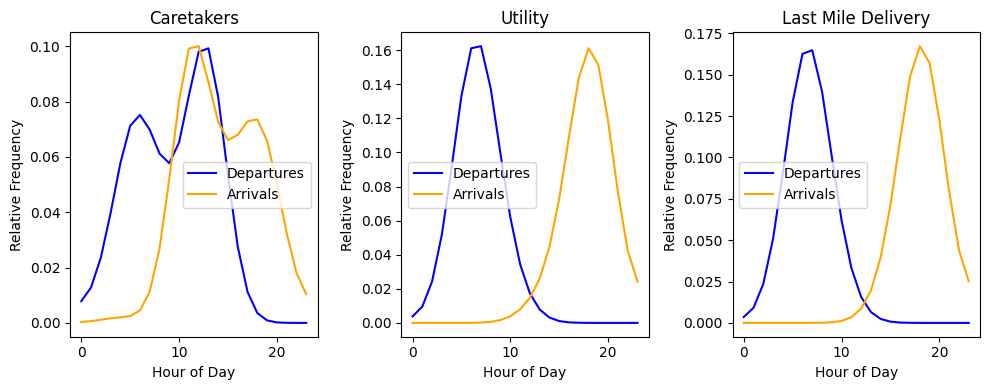

In [3]:
# Define a function to calculate and plot the smoothed histograms for departure and arrival hours
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.ndimage.filters import gaussian_filter1d
def plot_departure_arrival(df, ax, title):
    # Create a new column 'Location_shifted' that is the 'Location' column shifted down by 1.
    df['Location_shifted'] = df['Location'].shift(-1)

    # Create masks for departures and arrivals
    departure_mask = (df['Location'] == 'home') & (df['Location_shifted'] == 'driving')
    arrival_mask = (df['Location'] == 'driving') & (df['Location_shifted'] == 'home')

    # Extract departure and arrival times
    departures = df.loc[departure_mask, 'date']
    arrivals = df.loc[arrival_mask, 'date']

    # Extract the hour from the departure and arrival times
    departure_hours = departures.dt.hour
    arrival_hours = arrivals.dt.hour

    # Compute histograms for departure and arrival hours
    departure_hist, bins = np.histogram(departure_hours, bins=24, range=(0,24), density=True)
    arrival_hist, _ = np.histogram(arrival_hours, bins=24, range=(0,24), density=True)

    # Smooth the histograms using a Gaussian filter
    departure_smooth = gaussian_filter1d(departure_hist, 2)
    arrival_smooth = gaussian_filter1d(arrival_hist, 2)

    # Plot the smoothed histograms
    ax.plot(bins[:-1], departure_smooth, label='Departures', color='blue')
    ax.plot(bins[:-1], arrival_smooth, label='Arrivals', color='orange')

    ax.set_title(title)
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Relative Frequency')
    ax.legend()

# Load the data for caretakers, utility, and last mile delivery
df_ct = pd.read_csv("./Final_Inputs/30_ct.csv")
df_ct['date'] = pd.to_datetime(df_ct['date'])

df_ut = pd.read_csv("./Final_Inputs/25_ut.csv")
df_ut['date'] = pd.to_datetime(df_ut['date'])

df_lmd = pd.read_csv("./Final_Inputs/50_lmd.csv")
df_lmd['date'] = pd.to_datetime(df_lmd['date'])

fig, axs = plt.subplots(1, 3, figsize=(10, 4))

plot_departure_arrival(df_ct, axs[0], 'Caretakers')
plot_departure_arrival(df_ut, axs[1], 'Utility')
plot_departure_arrival(df_lmd, axs[2], 'Last Mile Delivery')

fig.tight_layout()

plt.show()

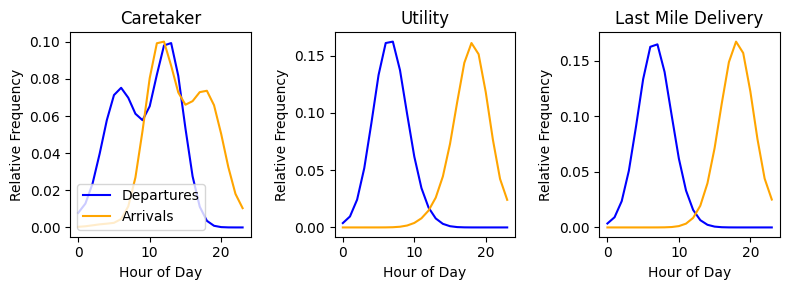

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(8, 3))

plot_departure_arrival(df_ct, axs[0], 'Caretaker')
plot_departure_arrival(df_ut, axs[1], 'Utility')
plot_departure_arrival(df_lmd, axs[2], 'Last Mile Delivery')
axs[0].legend(["Departures", "Arrivals"], loc="lower left")
axs[1].legend().remove()
axs[2].legend().remove()

fig.tight_layout()
plt.savefig("dep_arr_all.pdf")
plt.show()

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# Define the soc_violation_penalty function using the parameters of the fitted sigmoid function for the reward function
def soc_violation_penalty(missing_soc):
    x0, k = 0.29229767, 16.48461585  # Parameters from the fitted sigmoid function for the reward function
    return -500 / (1 + np.exp(-k * (missing_soc - x0))) + 1

# Define the overloading_penalty function using the parameters of the fitted piecewise sigmoid function for the overloading penalty function

def overloading_penalty(rel_loading):
    x0, k = 1.33298382, 15.77350877  # Parameters from the fitted piecewise sigmoid function for the overloading penalty function
    penalty = np.piecewise(rel_loading, [rel_loading < 1.1, rel_loading >= 1.1],
                           [0, lambda x: -700 / (1 + np.exp(-k * (x - x0)))])
    # If penalty is an array with only one element, return that element
    if isinstance(penalty, np.ndarray) and penalty.size == 1:
        penalty = penalty.item()
    return penalty

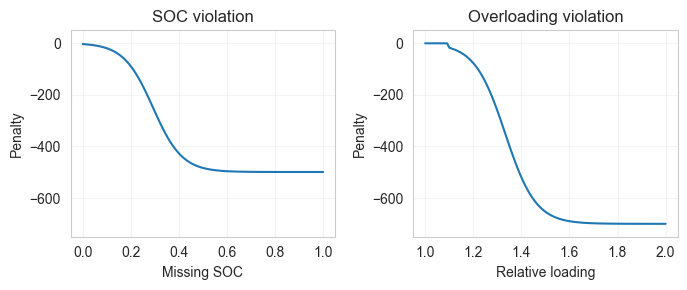

In [4]:

fig, ax = plt.subplots(1,2, figsize=(7,3))
x_soc = np.linspace(0,1,100)
x_grid = np.linspace(1,2,100)

ax[0].plot(x_soc, soc_violation_penalty(x_soc))
ax[1].plot(x_grid, overloading_penalty(x_grid))
ax[0].set_title("SOC violation")
ax[1].set_title("Overloading violation")
ax[0].grid(alpha=0.2)
ax[1].grid(alpha=0.2)

ax[0].set_ylim([-750, 50])
ax[1].set_ylim([-750, 50])

ax[0].set_xlabel("Missing SOC")
ax[0].set_ylabel("Penalty")

ax[1].set_xlabel("Relative loading")
ax[1].set_ylabel("Penalty")

plt.tight_layout()
plt.savefig("sigmoid_violations.pdf")
plt.show()

In [6]:
ct_arb = pd.read_csv("/home/enzo/Downloads/tb_log_1/train/tb_log_PPO_1690277405_CT_2021_arbitrage_PPO_0.csv")
ct_real = pd.read_csv("/home/enzo/Downloads/tb_log_1/train/tb_log_PPO_1690277410_ct_2021_realistic_PPO_0.csv")
lmd_arb = pd.read_csv("/home/enzo/Downloads/tb_log_1/train/tb_log_PPO_1690277418_LMD_2021_arbitrage_PPO_mul3_0.csv")
lmd_real = pd.read_csv("/home/enzo/Downloads/tb_log_1/train/tb_log_PPO_1690277424_LMD_2021_realistic_PPO_mul3_0.csv")
ut_arb = pd.read_csv("/home/enzo/Downloads/tb_log_1/train/tb_log_PPO_1690277436_UT_2021_arbitrage_PPO_mul4_0.csv")
ut_real = pd.read_csv("/home/enzo/Downloads/tb_log_1/train/tb_log_PPO_1690277433_UT_2021_realistic_PPO_0.csv")

ev_ct_arb = pd.read_csv("/home/enzo/Downloads/tb_log_1/eval/tb_log_PPO_1690277405_CT_2021_arbitrage_PPO_0.csv")
ev_ct_real = pd.read_csv("/home/enzo/Downloads/tb_log_1/eval/tb_log_PPO_1690277410_ct_2021_realistic_PPO_0.csv")
ev_lmd_arb = pd.read_csv("/home/enzo/Downloads/tb_log_1/eval/tb_log_PPO_1690277418_LMD_2021_arbitrage_PPO_mul3_0.csv")
ev_lmd_real = pd.read_csv("/home/enzo/Downloads/tb_log_1/eval/tb_log_PPO_1690277424_LMD_2021_realistic_PPO_mul3_0.csv")
ev_ut_arb = pd.read_csv("/home/enzo/Downloads/tb_log_1/eval/tb_log_PPO_1690277436_UT_2021_arbitrage_PPO_mul4_0.csv")
ev_ut_real = pd.read_csv("/home/enzo/Downloads/tb_log_1/eval/tb_log_PPO_1690277433_UT_2021_realistic_PPO_0.csv")


In [7]:
ct_arb_5 = pd.read_csv("/home/enzo/Downloads/tb_log_5/train/ct_arb.csv")
ct_real_5 = pd.read_csv("/home/enzo/Downloads/tb_log_5/train/ct_real.csv")
lmd_arb_5 = pd.read_csv("/home/enzo/Downloads/tb_log_5/train/lmd_arb.csv")
lmd_real_5 = pd.read_csv("/home/enzo/Downloads/tb_log_5/train/lmd_real.csv")
ut_arb_5 = pd.read_csv("/home/enzo/Downloads/tb_log_5/train/ut_arb.csv")
ut_real_5 = pd.read_csv("/home/enzo/Downloads/tb_log_5/train/ut_real.csv")

ev_ct_arb = pd.read_csv("/home/enzo/Downloads/tb_log_5/eval/ct_arb.csv")
ev_ct_real = pd.read_csv("/home/enzo/Downloads/tb_log_5/eval/ct_real.csv")
ev_lmd_arb = pd.read_csv("/home/enzo/Downloads/tb_log_5/eval/lmd_arb.csv")
ev_lmd_real = pd.read_csv("/home/enzo/Downloads/tb_log_5/eval/lmd_real.csv")
ev_ut_arb = pd.read_csv("/home/enzo/Downloads/tb_log_5/eval/ut_arb.csv")
ev_ut_real = pd.read_csv("/home/enzo/Downloads/tb_log_5/eval/ut_real.csv")


In [8]:
list_arb = [lmd_arb, ut_arb, ct_arb, lmd_real, ut_real, ct_real]
list_arb_5 = [lmd_arb_5, ut_arb_5, ct_arb_5, lmd_real_5, ut_real_5, ct_real_5]
list_ev = [ev_lmd_arb, ev_ut_arb, ev_ct_arb, ev_lmd_real, ev_ut_real, ev_ct_real]
label = ["LMD arb", "UT arb", "CT arb", "LMD real", "UT real", "CT real"]

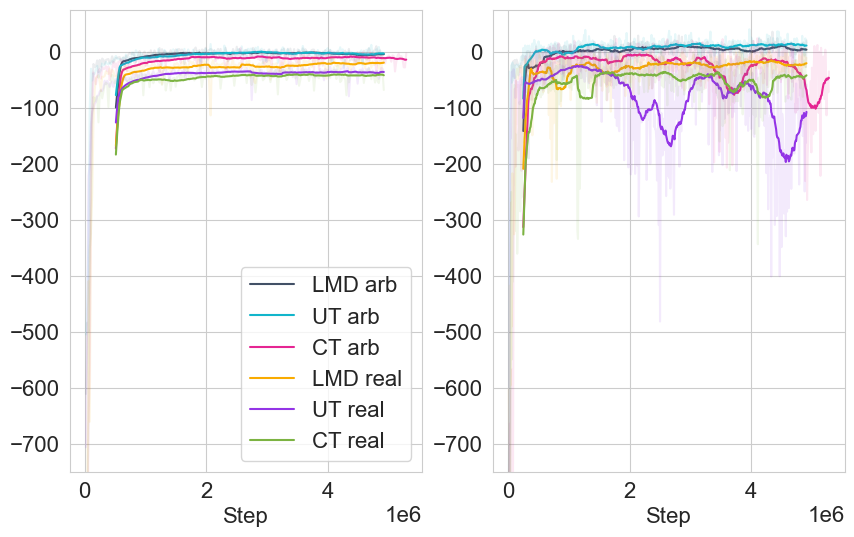

In [4]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
color = ["#425066", "#12B5CB", "#E52592", "#F9AB00", "#9334E6", "#7CB342"]

for i in range(6):
    list_arb[i].index = list_arb[i]["Step"]
    list_arb[i]["Value"].plot(ax=ax[0], color=color[i], alpha=0.1)
    list_arb[i].rolling(25).mean()["Value"].plot(ax=ax[0], color=color[i])
    ax[0].set_ylim([-750, 75])

# Retrieve lines from the axes
lines = ax[0].get_lines()

# Create a new list containing every second line
legend_lines = [lines[i] for i in range(1, len(lines), 2)]

# Manually set the legend using the collected lines and labels
ax[0].legend(handles=legend_lines, labels=label)

for i in range(6):
    list_ev[i].index = list_ev[i]["Step"]
    list_ev[i]["Value"].plot(ax=ax[1], color=color[i], alpha=0.1)
    list_ev[i].rolling(25).mean()["Value"].plot(ax=ax[1], color=color[i])
    ax[1].set_ylim([-750, 75])

plt.savefig("ppo_5_train_eval_tb.pdf")
plt.show()


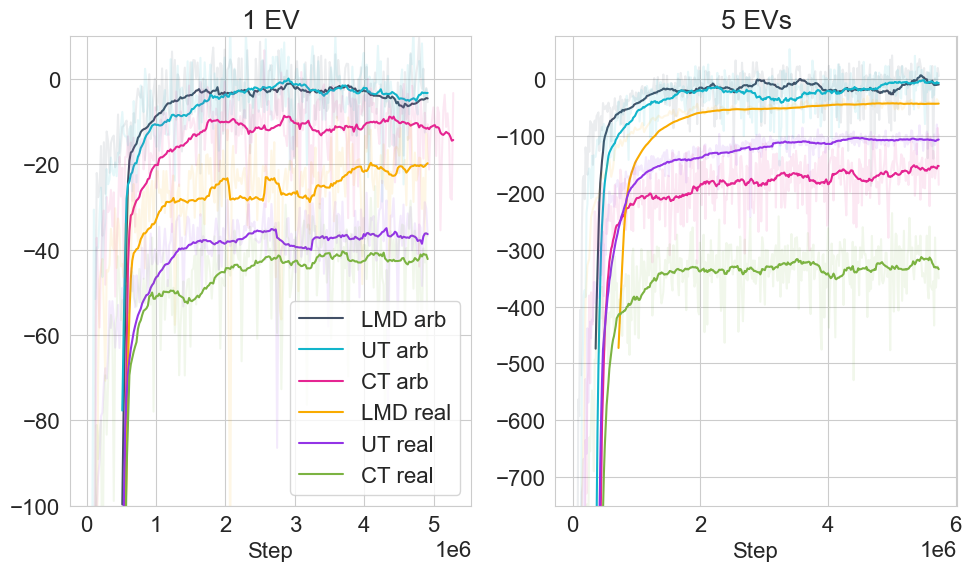

In [16]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
color = ["#425066", "#12B5CB", "#E52592", "#F9AB00", "#9334E6", "#7CB342"]

for i in range(6):
    list_arb[i].index = list_arb[i]["Step"]
    list_arb[i]["Value"].plot(ax=ax[0], color=color[i], alpha=0.1)
    list_arb[i].rolling(25).mean()["Value"].plot(ax=ax[0], color=color[i])
ax[0].set_ylim([-100, 10])
ax[0].set_title("1 EV")

# Retrieve lines from the axes
lines = ax[0].get_lines()

# Create a new list containing every second line
legend_lines = [lines[i] for i in range(1, len(lines), 2)]

# Manually set the legend using the collected lines and labels
ax[0].legend(handles=legend_lines, labels=label)

for i in range(6):
    list_arb_5[i].index = list_arb_5[i]["Step"]
    list_arb_5[i]["Value"].plot(ax=ax[1], color=color[i], alpha=0.1)
    list_arb_5[i].rolling(25).mean()["Value"].plot(ax=ax[1], color=color[i])
ax[1].set_ylim([-750, 75])
ax[1].set_title("5 EVs")
plt.tight_layout()
plt.savefig("ppo_train_1_5_tb.pdf")
plt.show()


In [2]:
td3_train = pd.read_csv("/home/enzo/Downloads/td3_ppo_comp/td3_lmd_arb_train.csv")
td3_ev = pd.read_csv("/home/enzo/Downloads/td3_ppo_comp/td3_lmd_arb_ev.csv")
ppo_train = pd.read_csv("/home/enzo/Downloads/td3_ppo_comp/ppo_lmd_arb_train.csv")
ppo_ev = pd.read_csv("/home/enzo/Downloads/td3_ppo_comp/ppo_lmd_arb_ev.csv")

In [3]:
list_train = [td3_train, ppo_train]
list_ev = [td3_ev, ppo_ev]
colors = ["#425066", "#12B5CB"]

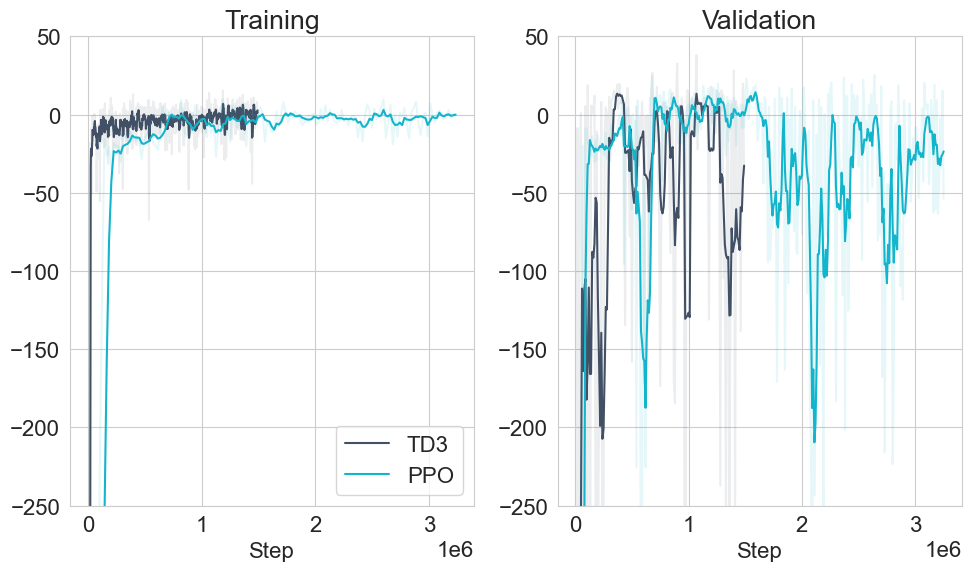

In [25]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
color = ["#425066", "#12B5CB", "#E52592", "#F9AB00", "#9334E6", "#7CB342"]
label = ["TD3", "PPO"]

for i in range(2):
    list_train[i].index = list_train[i]["Step"]
    list_train[i]["Value"].plot(ax=ax[0], color=color[i], alpha=0.1)
    list_train[i].rolling(5).mean()["Value"].plot(ax=ax[0], color=color[i])
    ax[0].set_ylim([-250, 50])

# Retrieve lines from the axes
lines = ax[0].get_lines()
ax[0].set_title("Training")

# Create a new list containing every second line
legend_lines = [lines[i] for i in range(1, len(lines), 2)]

# Manually set the legend using the collected lines and labels
ax[0].legend(handles=legend_lines, labels=label)

for i in range(2):
    list_ev[i].index = list_ev[i]["Step"]
    list_ev[i]["Value"].plot(ax=ax[1], color=color[i], alpha=0.1)
    list_ev[i].rolling(5).mean()["Value"].plot(ax=ax[1], color=color[i])
    ax[1].set_ylim([-250, 50])
ax[1].set_title("Validation")
plt.savefig("ppo_td3_comp_lmd_arb.pdf")
plt.tight_layout()
plt.show()
